# Crime peak in evening during Summer 2014 in San Francisco


I used [socrata](https://www.socrata.com/) data to analyze crime occurence pattern in San-Francisco during summer 2014. Data analysis revealed that crime were most likely to happen beetween 16:00 and 20:00 than at any other hour of the day.

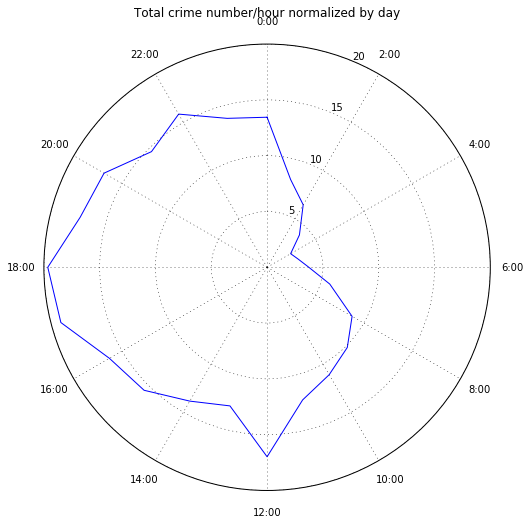

In [49]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import time
import math

%matplotlib inline

def getcategory(df, name):
    return [f for f in df.groupby(name).groups]

def mapcategory(df, name):
    for groupname in getcategory(df,name):
        df[groupname] = df[name].map(lambda x : 1 if x==groupname else 0) 

sanfrancisco = pd.read_csv('./data/sanfrancisco_incidents_summer_2014.csv')
sanfrancisco['hour'] = sanfrancisco['Time'].map(lambda x: time.strptime(x,'%H:%M').tm_hour)
sanfrancisco = sanfrancisco[sanfrancisco['Category']!='NON-CRIMINAL']
mapcategory(sanfrancisco,'Category')

def sumup(df, name, sumup):
    categories = getcategory(df, name)
    categories.append(sumup)
    onlycategory = df[categories]
    res = onlycategory.groupby(sumup).sum()
    res['total'] = res.sum(axis=1)
    return res

def plotCategoryCircularIndividual(group, title):
    grouped = group.sort_index()
    grouped = grouped.reindex(range(0,24), fill_value = 0)
    anglevalue = Series( [math.radians(a) for a in range(0,360,15)] )
    temps_df = DataFrame({title: grouped, 'angle':anglevalue })
    if (temps_df[title].sum() < 10):
        return
    df2 = pd.DataFrame([[ temps_df[title][0], math.radians(360)]], columns=[title,'angle'])
    temps_df = temps_df.append(df2, ignore_index=True) 
    sp = plt.subplot(1, 1, 1, projection='polar')
    sp.set_theta_zero_location('N')
    sp.set_theta_direction(-1)
    tick_locs = [math.radians(a) for a in range(0,360,30)]
    tick_lbls = ["{0}:00".format(f) for f in range(0,24,2)]
    plt.xticks(tick_locs, tick_lbls)
    plt.plot(temps_df['angle'],temps_df[title], linewidth=1)
    
def plotCategoryCircularFromRaw(byCategory,group):
    grouped = byCategory.get_group(group)['hour'].value_counts()
    plotCategoryCircularIndividual( grouped,group)
    
        
def plotCategoryCircular(byCategory,filter = None):
    for group in byCategory.groups:
        if ((filter is not None) and (group in filter)):
            continue
        plotCategoryCircularFromRaw(byCategory,group)

sfbyhour = sumup(sanfrancisco,'Category','hour')
dates = pd.date_range('2014-06-01', '2014-08-31')
total_rows = dates.shape[0]

plt.clf()   
plt.figure(figsize=(8,8))
plotCategoryCircularIndividual(sfbyhour['total']/total_rows,'Total')
plt.title('Total crime number/hour normalized by day')
plt.show()  

This graphic shows the hours (expressed as a polar The first graphic represents hour of the day as a polar scale from 0 to 24:00) versus the number of crime by day during summer 2014 in seatle. It can be observed that the minimum is reached occurs at 4:00 AM (2.66 crime by day in average) and the maximum is reached at 18:00 (21.29 crime by day). It is also visible that crime activity are low from 1:00 to 8:00 (below 10 crime by day) and that there is a segondary crime peak at 12:00 (19.3 crime by dya.) 

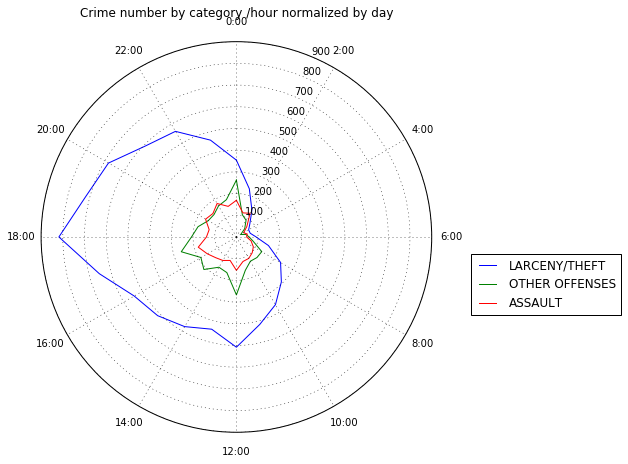

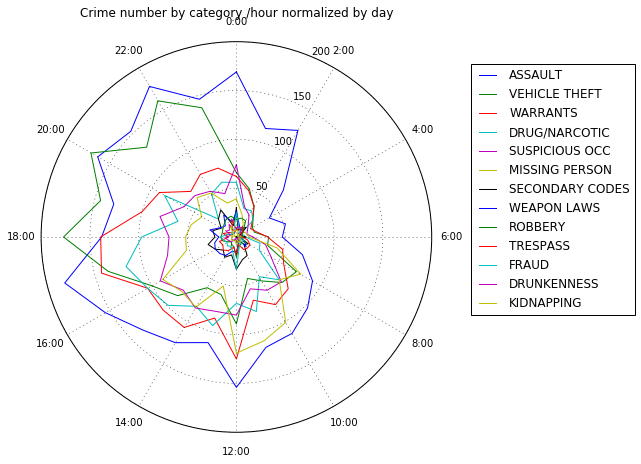

In [48]:
def Top(number, df, skip=0):
    return pd.DataFrame({'count':df.sum()}).sort_values('count',ascending=False).iloc[1+skip:number+1,:]

def displayTop(number, df, byCategory, title, normalise, skip=0):
    element = Top(number,df,skip)
    plt.clf()      
    plt.figure(figsize=(7,7))
    plt.title('Crime frequency by category seattle')
    for group in list(element.index):
        plotCategoryCircularFromRaw(byCategory, group)
    plt.legend(loc=(1.1,0.3))
    plt.title(title)
    plt.show()  
    
byCategorysf = sanfrancisco.groupby('Category')
displayTop(3, sfbyhour, byCategorysf,'Crime number by category /hour normalized by day', total_rows)
displayTop(15, sfbyhour, byCategorysf,'Crime number by category /hour normalized by day',total_rows, 2)